**TCS RIO 210 - SALARY PREDICTION DASHBOARD FOR HRs by KHUSHI UPADHYE**

**Importing the Necessary Libraries**

In [ ]:
import pandas as pd #data manipulation library
import numpy as np #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #plotting the graphs and charts

from sklearn.svm import SVC #Support Vector Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.preprocessing import StandardScaler #StandardScaler
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier #KNN

**Loading and Reading the Dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/salary_data.csv")

df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
df.shape

(32561, 14)

**Displaying the Column Names and Column Information**

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


**Checking for Null or Missing Values**

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
capital-gain,0


**Let us drop the columns capital-gain, capital-loss and education-num**

In [ ]:
df.drop(['capital-gain','capital-loss','education-num'],axis=1,inplace=True)

df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


**Displaying the Changed Columns**

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

**Changing the Order of the Columns**

**Hours-per-week has been shifted from eigth column to the second column**

In [ ]:
df = df[['age', 'hours-per-week', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country','salary']]

df.head()

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


**Checking Age Distribution**

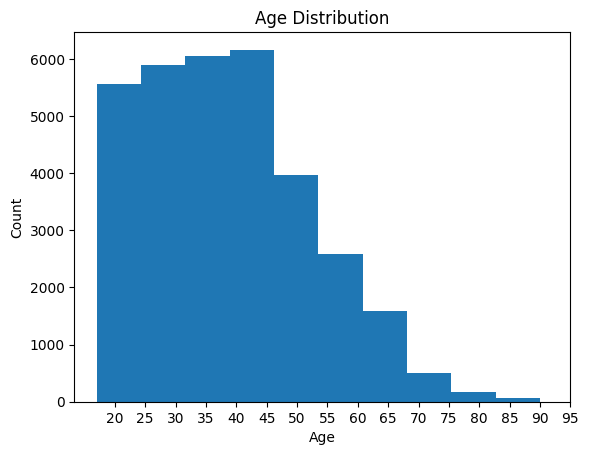

In [ ]:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(20,100,5))
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Age Distribution')
plt.show()

**Checking Work Class**

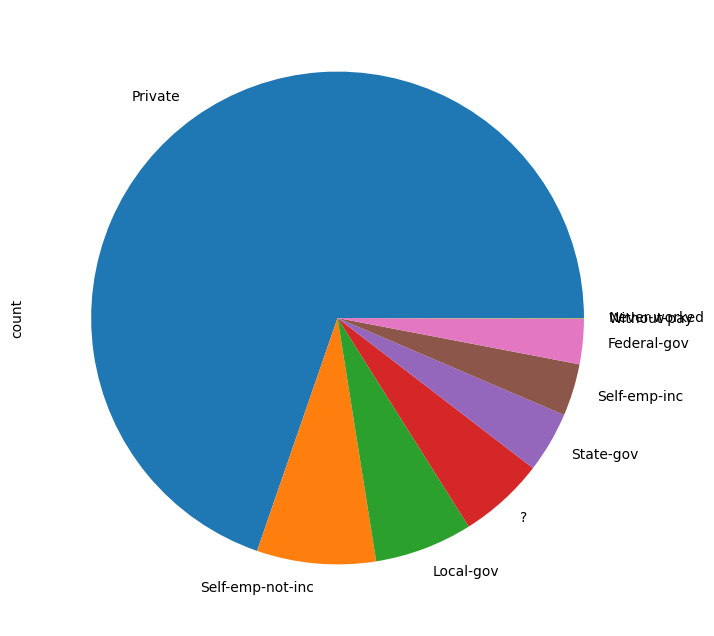

In [ ]:
df['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

**Checking Education**

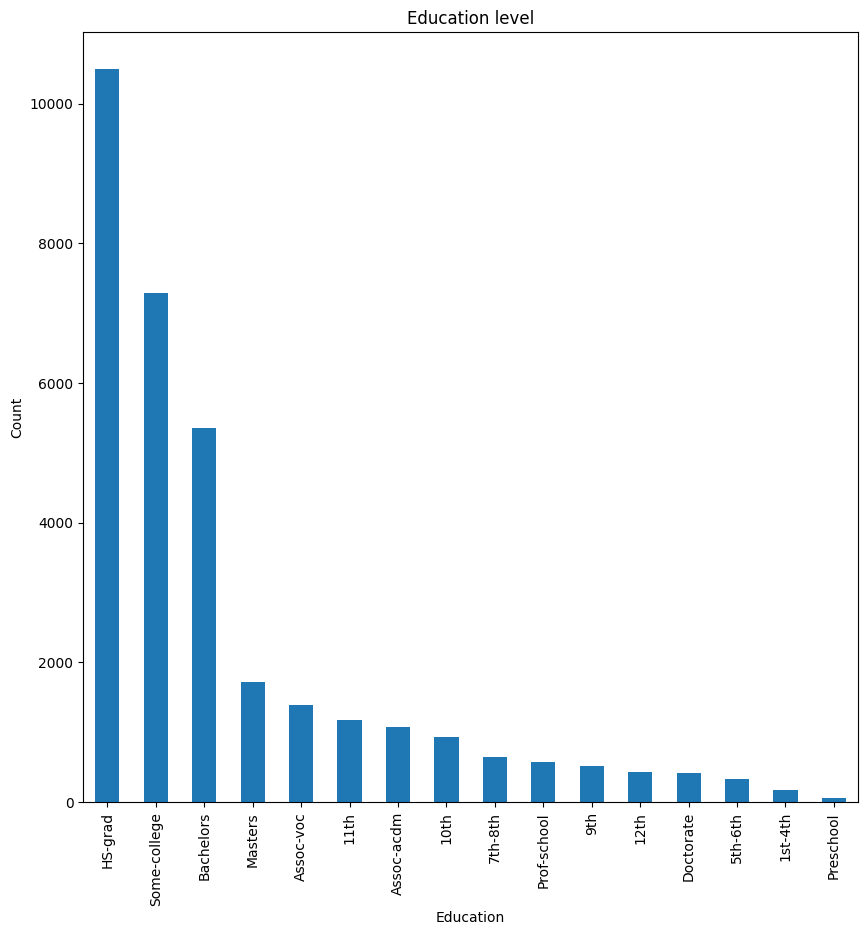

In [ ]:
df['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Education level')
plt.show()

**Checking Marital Status**

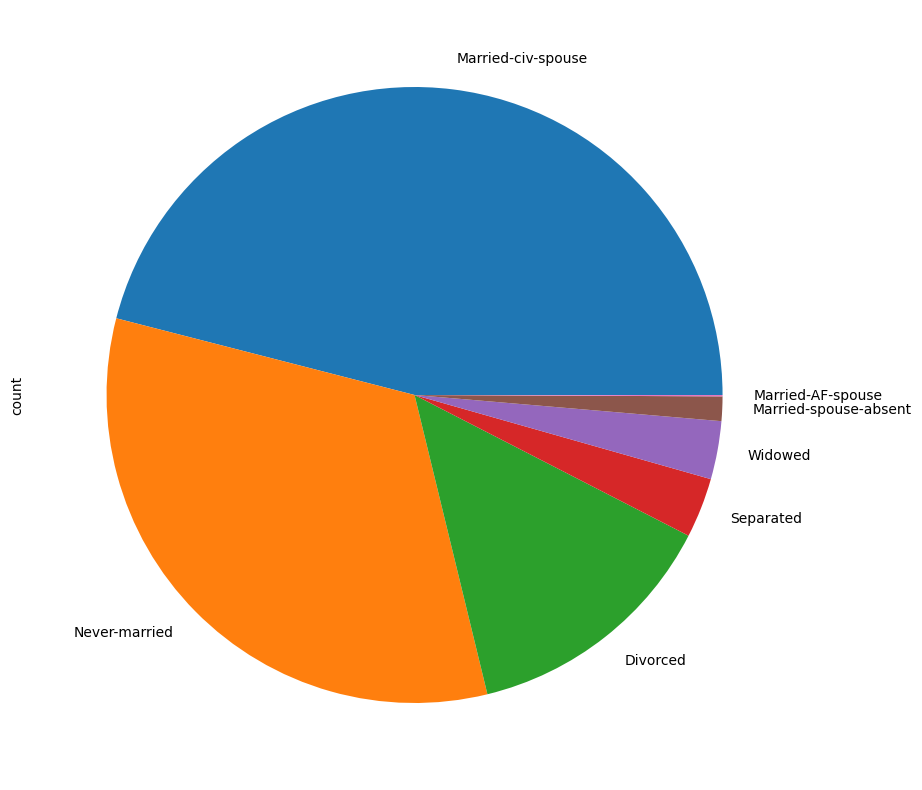

In [ ]:
df['marital-status'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

**Checking Occupation**

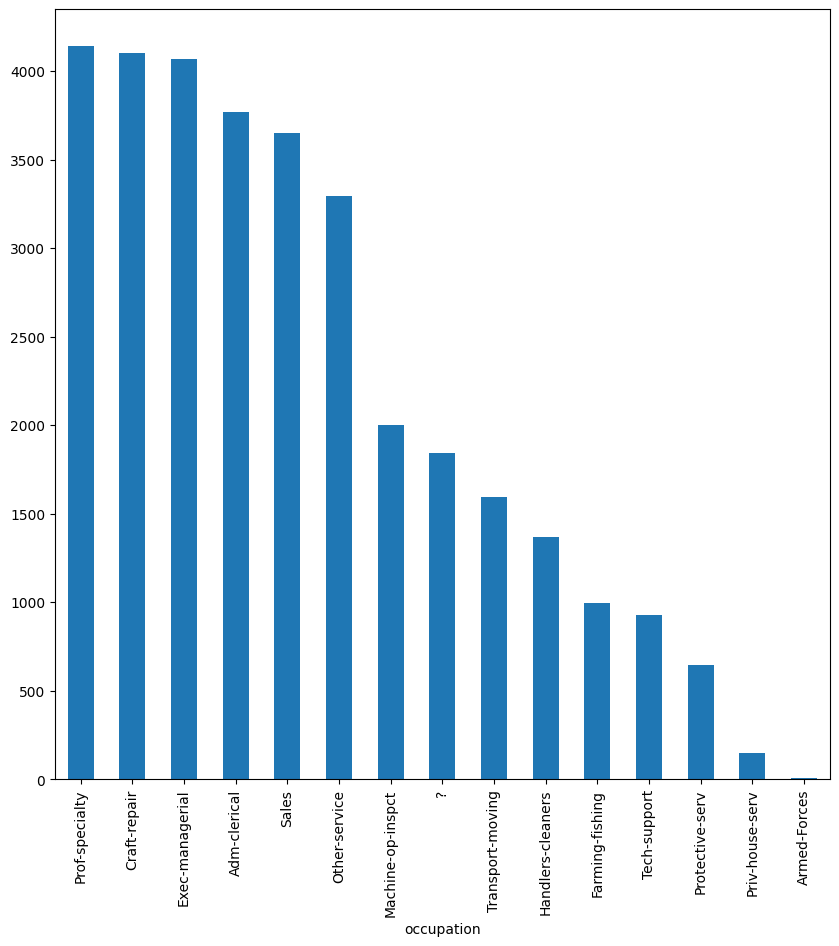

In [ ]:
df['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

**Checking Relationship**

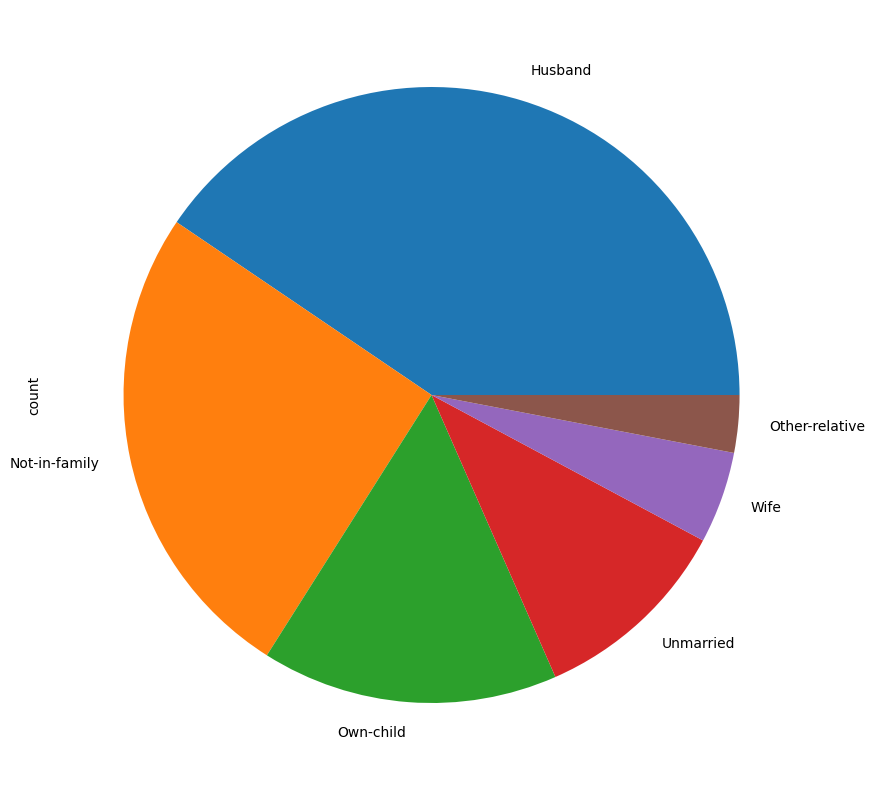

In [ ]:
df['relationship'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

**Checking Race**

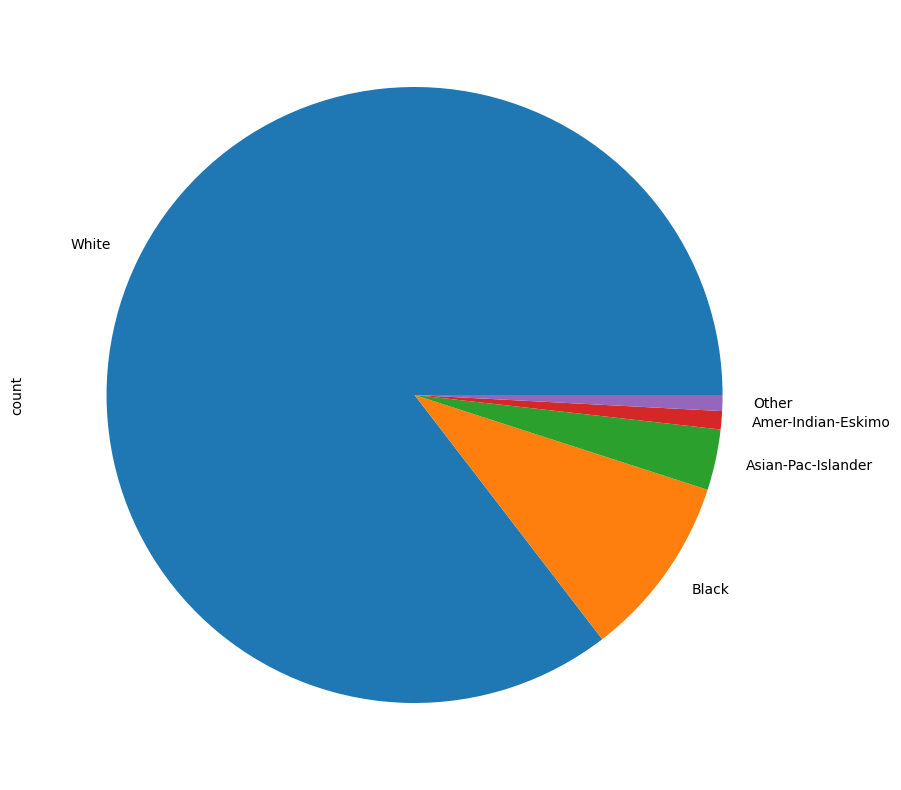

In [ ]:
df['race'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']=(10,10)
plt.show()

**Checking Sex**

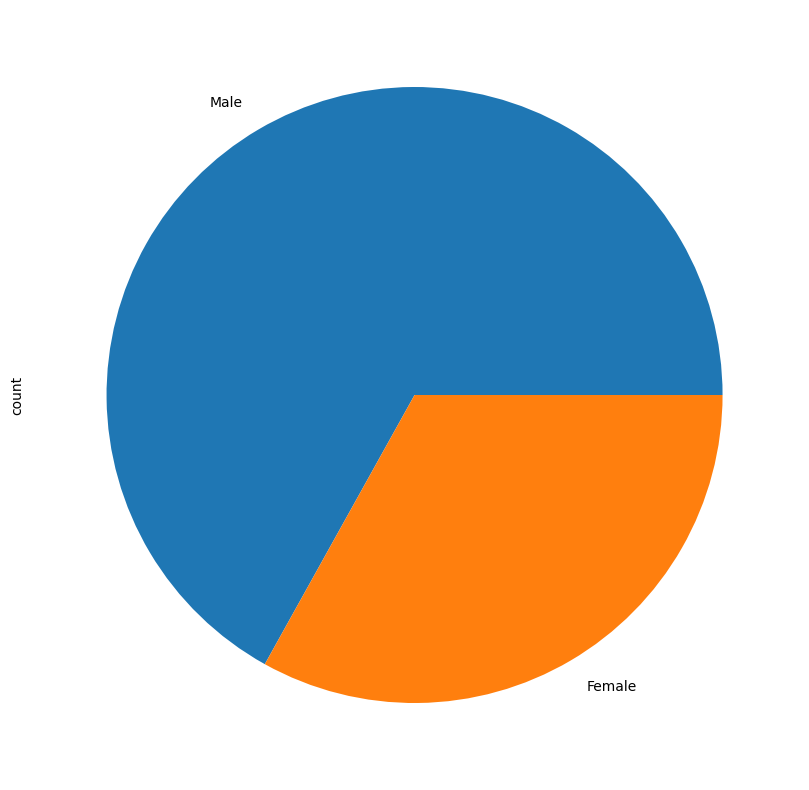

In [ ]:
df['sex'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

**Checking Hours Per Week**

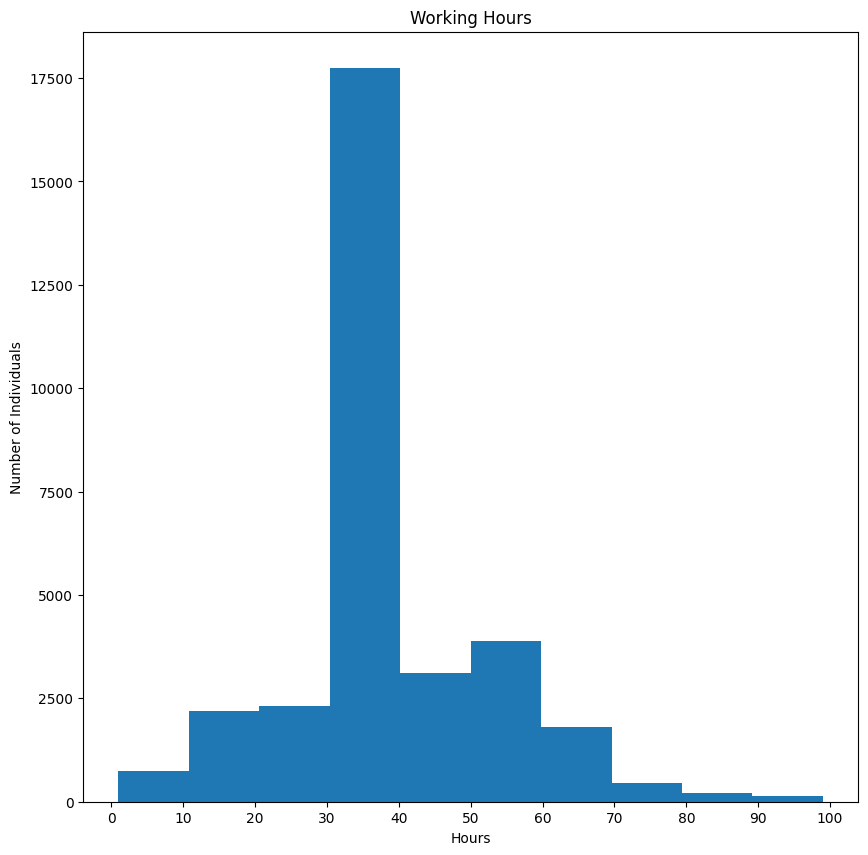

In [ ]:
plt.hist(df['hours-per-week'])
plt.xlabel('Hours')
plt.ylabel('Number of Individuals')
plt.xticks(np.arange(0,110,10))
plt.title('Working Hours')
plt.show()

**Checking Native Country**

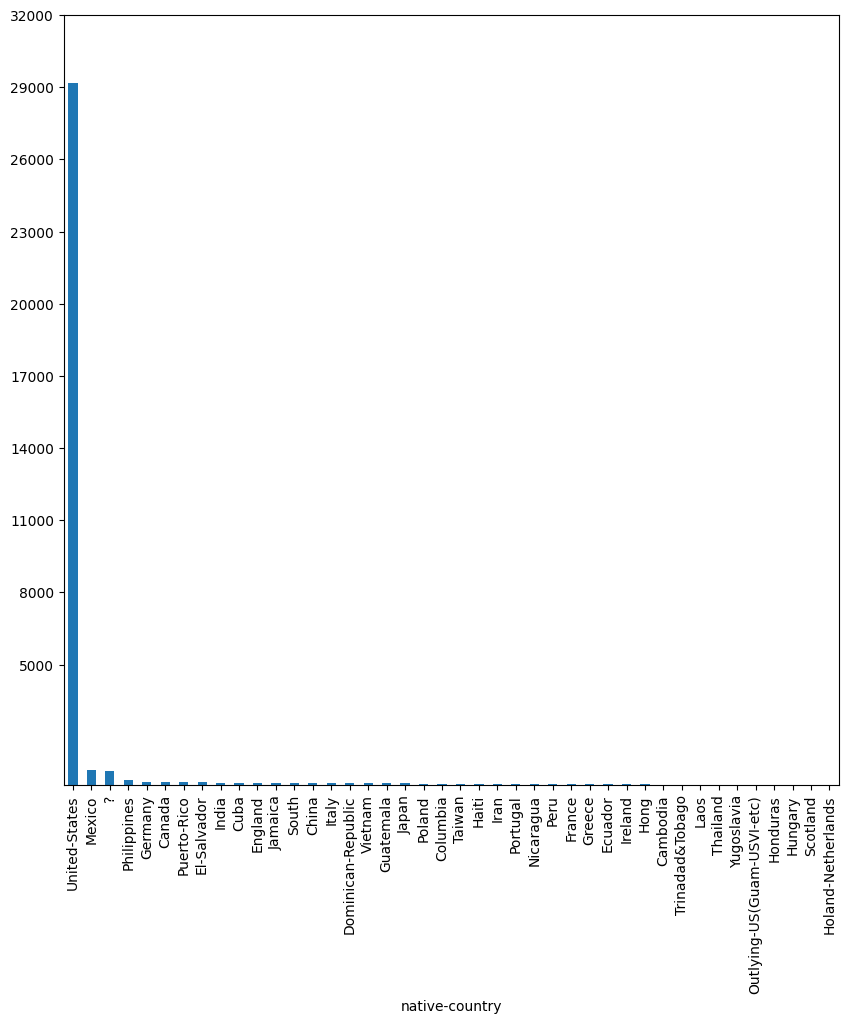

In [ ]:
df['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

**Since we found records containing a special character '?' in the occupation, workclass and native-country columns**

**Let us remove the ? character from these columns**

In [ ]:
df.loc[(df['occupation'] == '?') | (df['workclass'] == '?') | (df['native-country'] == '?')]

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
14,40,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,?,>50K
27,54,60,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,South,>50K
38,31,38,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,?,>50K
51,18,30,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,?,<=50K
61,32,40,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32530,35,55,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,United-States,>50K
32531,30,99,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,United-States,<=50K
32539,71,10,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,United-States,>50K
32541,41,32,?,HS-grad,Separated,?,Not-in-family,Black,Female,United-States,<=50K


**Removing the records containing ? from the workclass column**

In [ ]:
df.drop(df[df['workclass'] == '?'].index, inplace = True)

df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,40,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,58,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,22,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


**Removing the records containing ? based on occupation column**

In [ ]:
df.drop(df[df['occupation'] == '?'].index, inplace = True)

df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,40,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,58,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,22,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


**Removing records containing ? from the native-country column**

In [ ]:
df.drop(df[df['native-country'] == '?'].index, inplace = True)

df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,40,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,58,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,22,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


**Checking if the records containing ? are removed**

**Checking Occupation**

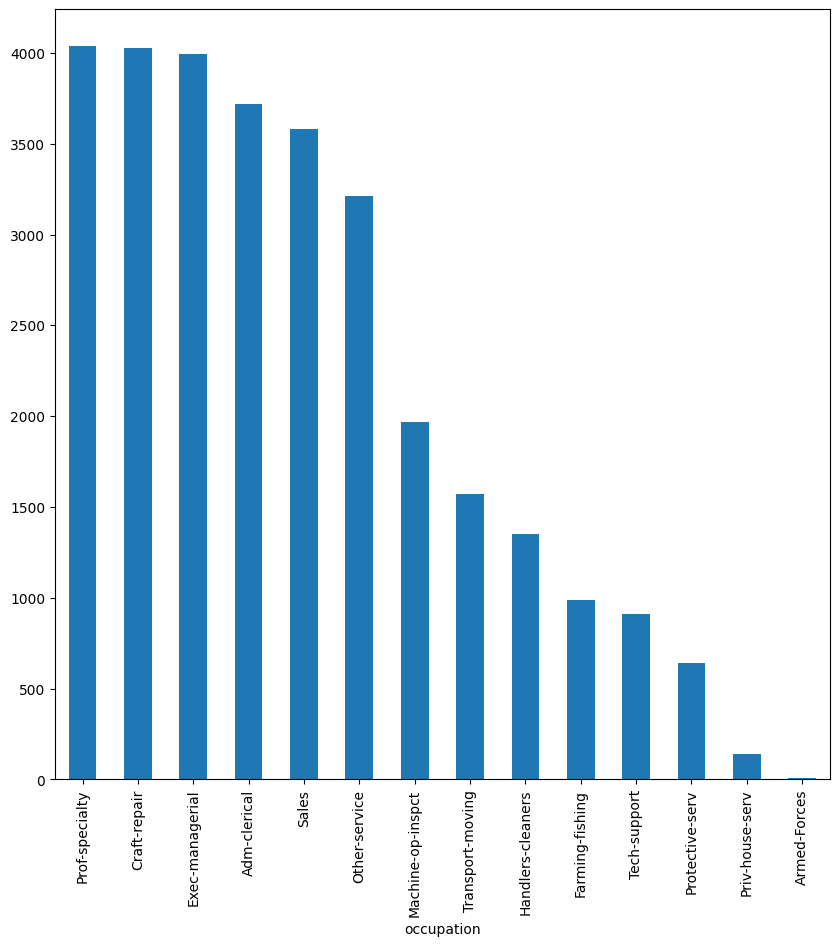

In [ ]:
df['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

**Checking if the records are removed successfully based on Native-Country**

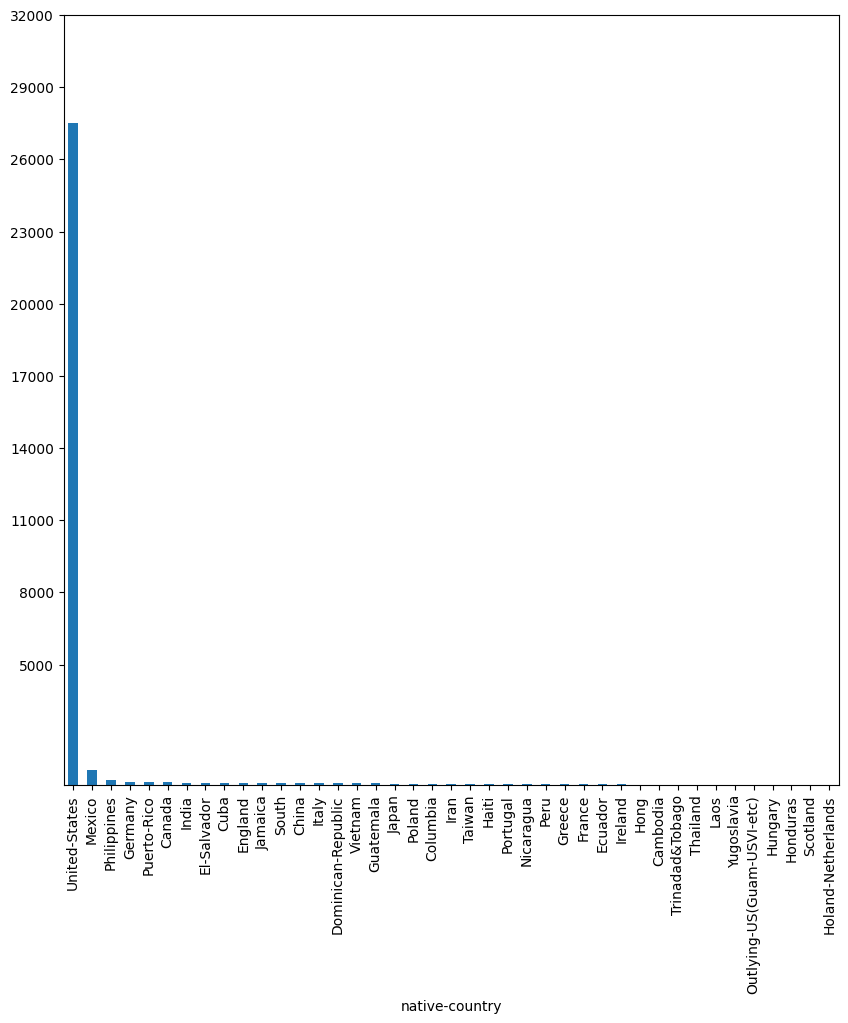

In [ ]:
df['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

**Checking if the records are removed successfully from Work Class**

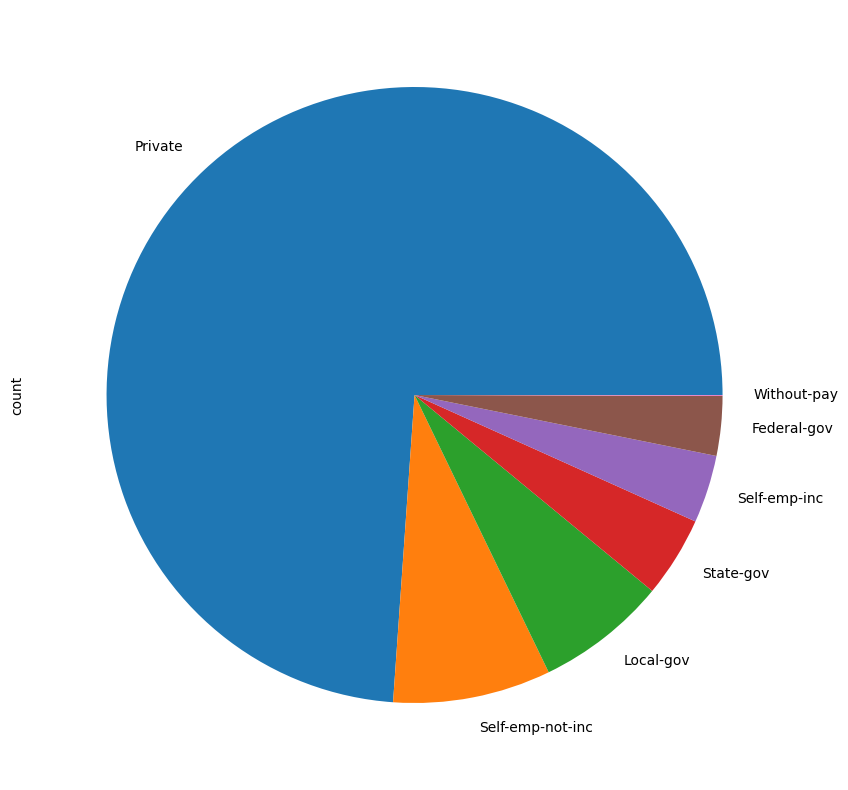

In [ ]:
df['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [ ]:
df.reset_index(inplace=True,drop=True)

df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
30157,27,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30158,40,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30159,58,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30160,22,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


**Moving the Salary Column to other variable**

In [ ]:
target_salary = df.pop('salary')

df.head()

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


**Converting the Categorical Variables into Numerical Variables**

In [ ]:
label = {}
for c in df.iloc[:,2:].columns:
   df[c], label[c] = pd.factorize(df[c])
df.head()

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,40,0,0,0,0,0,0,0,0
1,50,13,1,0,1,1,1,0,0,0
2,38,40,2,1,2,2,0,0,0,0
3,53,40,2,2,1,2,1,1,0,0
4,28,40,2,0,1,3,2,1,1,1


In [ ]:
df.shape

(30162, 10)

**Label Encoding**

In [ ]:
from sklearn import preprocessing
label= preprocessing.LabelEncoder()
df['workclass']=label.fit_transform(df['workclass'])
df['education']=label.fit_transform(df['education'])
df['occupation']=label.fit_transform(df['occupation'])
df['sex']=label.fit_transform(df['sex'])
df['race']=label.fit_transform(df['race'])
df['native-country']=label.fit_transform(df['native-country'])
df['marital-status']=label.fit_transform(df['marital-status'])
df['relationship']=label.fit_transform(df['relationship'])

df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,40,0,0,0,0,0,0,0,0
1,50,13,1,0,1,1,1,0,0,0
2,38,40,2,1,2,2,0,0,0,0
3,53,40,2,2,1,2,1,1,0,0
4,28,40,2,0,1,3,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...
30157,27,38,2,6,1,9,2,0,1,0
30158,40,40,2,1,1,8,1,0,0,0
30159,58,40,2,1,6,0,4,0,1,0
30160,22,20,2,1,0,0,3,0,0,0


**Data Normalization**

In [ ]:
from sklearn.model_selection import train_test_split
#train=70
#test=30
x_train,x_test,y_train,y_test=train_test_split(df,target_salary,test_size=0.30,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

scaler = StandardScaler()
x = scaler.fit_transform(df.values)
x

(21113, 10) (9049, 10) (21113,) (9049,)


array([[ 0.04279571, -0.07773411, -2.25653747, ..., -0.34586067,
        -0.69280616, -0.23923831],
       [ 0.88028814, -2.3315307 , -1.18675527, ..., -0.34586067,
        -0.69280616, -0.23923831],
       [-0.03333996, -0.07773411, -0.11697307, ..., -0.34586067,
        -0.69280616, -0.23923831],
       ...,
       [ 1.48937355, -0.07773411, -0.11697307, ..., -0.34586067,
         1.44340518, -0.23923831],
       [-1.25151078, -1.74721307, -0.11697307, ..., -0.34586067,
        -0.69280616, -0.23923831],
       [ 1.0325595 , -0.07773411,  3.09237353, ..., -0.34586067,
         1.44340518, -0.23923831]])

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=2000)
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)
con_lr=confusion_matrix(y_test,pred1)
print("The Confusion Matrix of Logistic Regression is : \n",con_lr)
acc_lr=accuracy_score(y_test,pred1)
print('Accuracy:',acc_lr*100)

The Confusion Matrix of Logistic Regression is : 
 [[6356  408]
 [1745  540]]
Accuracy: 76.20731572549452


In [ ]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

       <=50K       0.78      0.94      0.86      6764
        >50K       0.57      0.24      0.33      2285

    accuracy                           0.76      9049
   macro avg       0.68      0.59      0.59      9049
weighted avg       0.73      0.76      0.72      9049



**RANDOM FOREST CLASSIFIER**

In [ ]:
model=RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)
pred2=model.predict(x_test)
con_rf=confusion_matrix(y_test,pred2)
print("The Confusion Matrix of Random Forest Classifier is : \n",con_rf)
acc_rf=accuracy_score(y_test,pred2)
print('Accuracy: ',acc_rf*100)

The Confusion Matrix of Random Forest Classifier is : 
 [[6052  712]
 [1024 1261]]
Accuracy:  80.81555973035694


In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

       <=50K       0.86      0.89      0.87      6764
        >50K       0.64      0.55      0.59      2285

    accuracy                           0.81      9049
   macro avg       0.75      0.72      0.73      9049
weighted avg       0.80      0.81      0.80      9049



**DECISION TREE CLASSIFIER**

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.fit(x_train,y_train)
pred3=dtc.predict(x_test)
con_dtc=confusion_matrix(y_test,pred3)
print("The Confusion Matrix of Decision Tree is: \n",con_dtc)
acc_dtc=accuracy_score(y_test,pred3)
print('Accuracy:',acc_dtc*100)

The Confusion Matrix of Decision Tree is: 
 [[5732 1032]
 [1055 1230]]
Accuracy: 76.93667808597635


In [ ]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

       <=50K       0.84      0.85      0.85      6764
        >50K       0.54      0.54      0.54      2285

    accuracy                           0.77      9049
   macro avg       0.69      0.69      0.69      9049
weighted avg       0.77      0.77      0.77      9049



**Support Vector Classifier**

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
pred4=svc.predict(x_test)
con_svc=confusion_matrix(y_test,pred4)
print("The Confusion Matrix of SVM is: \n",con_svc)
acc_svc=accuracy_score(y_test,pred4)
print('Accuracy:',acc_svc*100)

The Confusion Matrix of SVM is: 
 [[6742   22]
 [2231   54]]
Accuracy: 75.102221239916


In [ ]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      6764
        >50K       0.71      0.02      0.05      2285

    accuracy                           0.75      9049
   macro avg       0.73      0.51      0.45      9049
weighted avg       0.74      0.75      0.65      9049



**K-Nearest Neighbor (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

acc_values=[]
neighbors=np.arange(70,90)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(x_train, y_train)
    pred5=knn.predict(x_test)
    acc_knn=accuracy_score(y_test,pred2)
    acc_values.append(acc_knn)

Text(0, 0.5, 'accuracy')

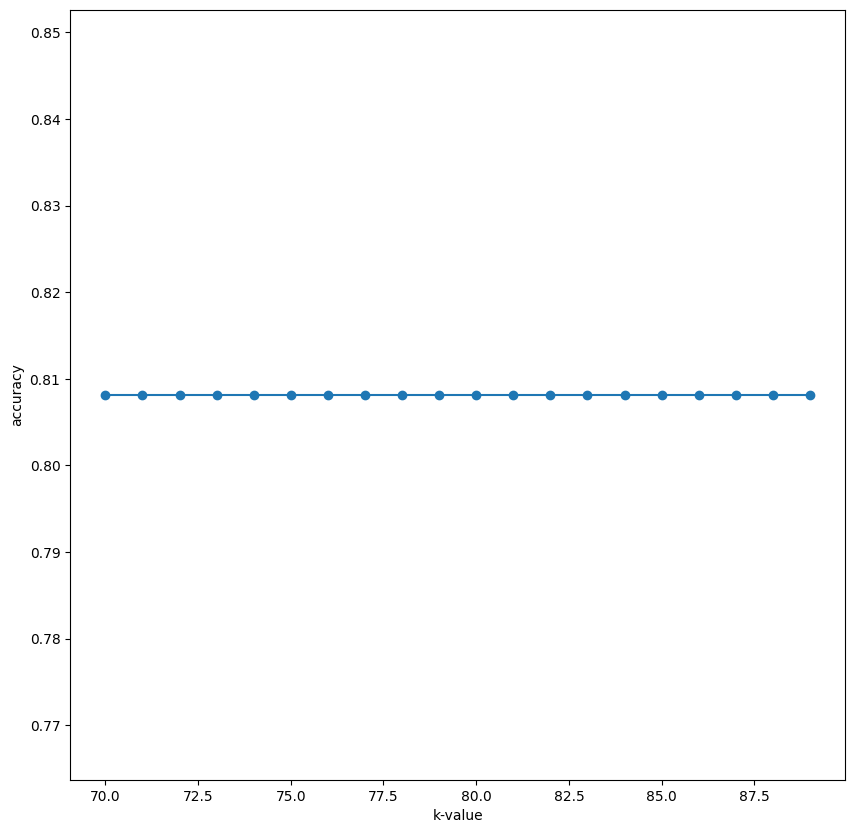

In [ ]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-value')
plt.ylabel('accuracy')

**Model Summary**

In [ ]:
#Model Summary

print("The Accuracy of Logistic Regression is: \n",acc_lr*100)
print("The accuracy of Random Forest Classifier is: \n",acc_rf*100)
print("The accuracy of Decision tree is: \n",acc_dtc*100)
print("The accuracy of SVM is: \n",acc_svc*100)
print("The accuracy of KNN is: \n",acc_knn*100)

The Accuracy of Logistic Regression is: 
 76.20731572549452
The accuracy of Random Forest Classifier is: 
 80.81555973035694
The accuracy of Decision tree is: 
 76.93667808597635
The accuracy of SVM is: 
 75.102221239916
The accuracy of KNN is: 
 80.81555973035694


In [ ]:
from tabulate import tabulate

In [ ]:
table = [['Model Name', 'Accuracy Score'], ['Logistic Regression',acc_lr], ['Random Forest',acc_rf],
         ['Decision tree',acc_dtc],["SVM",acc_svc],['KNN',acc_knn]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤══════════════════╕
│ Model Name          │   Accuracy Score │
╞═════════════════════╪══════════════════╡
│ Logistic Regression │         0.762073 │
├─────────────────────┼──────────────────┤
│ Random Forest       │         0.808156 │
├─────────────────────┼──────────────────┤
│ Decision tree       │         0.769367 │
├─────────────────────┼──────────────────┤
│ SVM                 │         0.751022 │
├─────────────────────┼──────────────────┤
│ KNN                 │         0.808156 │
╘═════════════════════╧══════════════════╛


**Random Forest Classifier has the best accuracy amongst all the other models.**
**So let us choose Random Forest for hyperparameter tuning and improving performance to predict salary**

In [ ]:
#Hyperparameter tuning of Random Forest Classifier

rf=RandomForestClassifier(criterion='gini',max_depth=10,n_estimators=20)
rf.fit(x_train,y_train)
y_pr=rf.predict(x_test)
acc_sc=accuracy_score(y_test,y_pr)*100
acc_sc

82.46215051386893

In [ ]:
#Prediction with User Defined Data

#Generating a Particular Test Data

In [ ]:
test_data = []
test_data.append(int(input('Enter the Age : ')))
test_data.append(int(input('Enter the Number of Hours he/she Works Per Week : ')))
test_data.append(input('Enter the Work-class : '))
test_data.append(input('Enter the Education level : '))
test_data.append(input('Enter the Marital-status : '))
test_data.append(input('Enter the Occupation : '))
test_data.append(input('Enter the Relationship Status : '))
test_data.append(input('Enter the Race : '))
test_data.append(input('Enter the Sex : '))
test_data.append(input('Enter the Native-Country : '))

dft = pd.DataFrame({'age' : [test_data[0]],
                   'hours-per-week' : [test_data[1]],
                   'work-class' : [test_data[2]],
                   'education' : [test_data[3]],
                   'marital-status' : [test_data[4]],
                   'occupation' : [test_data[5]],
                   'relationship' : [test_data[6]],
                   'race' : [test_data[7]],
                   'sex' : [test_data[8]],
                   'native-country' : [test_data[9]]
                   })
labelt = {}
for c in dft.iloc[:,2:].keys():
   dft[c], labelt[c] = pd.factorize(dft[c])
test_scaler = StandardScaler()
dft = test_scaler.fit_transform(dft.values)
pred = model.predict(dft)
print(f"The salary will be {pred[0]}")

Enter the Age : 50
Enter the Number of Hours he/she Works Per Week : 40
Enter the Work-class : Private
Enter the Education level : Masters
Enter the Marital-status : Married-civ-spouse
Enter the Occupation : Sales
Enter the Relationship Status : Wife
Enter the Race : White
Enter the Sex : Male
Enter the Native-Country : United-States
The salary will be <=50K


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
